# Acoustic Feature Demo

In [1]:
import avn.dataloading as dataloading
import avn.acoustics as acoustics

import pandas as pd

In this tutorial, we will be using the avn.acoustics module to calculate a suite of acoustic features first for a single period of song, then for all syllables in a syllable table. The song features included in avn are based on those in Sound Analysis Pro (SAP). They include: 
- Goodness of Pitch
- Mean Frequency
- Wiener Entropy
- Amplitude
- Amplitude Modulation
- Frequency Modulation
- Pitch

I plan to add a notebook with more information about each of these features in the future, but in the meantime more detailed descriptions of the features can be found in the Sound Analysis Pro documentation here: http://soundanalysispro.com/manual/chapter-4-the-song-features-of-sap2

## Calculating Acoustic Features for a Single Song Interval

### Creating a SongInterval Object

AVN's acoustics module centers around a class called `SongInterval`. This class stores information about a particular interval of audio, be that a song motif, a single syllable, or a full .wav file. It also has many methods which allow you to quickly calculate each acoustic feature across the interval and to extract summary statistics for each feature. 

Let's begin by loading an example .wav file using AVN's `dataloading` module: 

In [2]:
song = dataloading.SongFile("../sample_data/G402/G402_43362.23322048_9_19_6_28_42.wav")

We create our `SongInterval` object by passing this `SongFile` type object as an input to `acoustics.SongInterval()`. You also have the option to pass the onset and offset timestamps within the file of your interval of interest, but if these aren't specified the SongInterval will consist of the full file. In this tutorial, we will be looking at only the first 2 seconds of the file.

In [3]:
song_interval = acoustics.SongInterval(song, onset = 0, offset = 2)

`acoustics.SongInterval()` also has many other optional parameters that you can set to change how the acoustic features are calculated. The default parameters are well suited for the analysis of zebra finch song and match those used by Sound Analysis Pro. It is unlikely that you would have need to change them, but if you're curious the full list of parameters, their default values, and a brief explanation of how each is used is available in the docstring of the `SongInterval` class. 

### Calculating Acoustic Features

Now that we have our `SongInterval` object ready, we can calculate any single acoustic feature over this interval by calling one of the following functions: 

- `.calc_goodness()` to calculate the goodness of pitch
- `.calc_mean_frequency()` to calculate the mean frequency
- `.calc_frequency_modulation()` to calculate the frequency modulation
- `.calc_amplitude_modulation()` to calculate the amplitude modulation
- `.calc_entropy()` to calculate the Weiner entropy
- `.calc_amplitude()` to calculate the amplitude
- `.calc_pitch()` to estimate the fundamental frequency

Each of these functions will return a numpy array containing the value of the acoustic feature for each short time window in the song interval. As an example, let's calculate the goodness of pitch. 

In [4]:
goodness = song_interval.calc_goodness()
print("Shape of Output: " + str(goodness.shape))
goodness

Shape of Output: (2206,)


array([0.08748554, 0.08418637, 0.08150075, ..., 0.07466519, 0.09283684,
       0.08723036])

If you want to calculate multiple acoustic features, this can be done more efficiently with the `.calc_all_features()` method. You can pass this method a list of all the acoustic features that you want to calculate and it will return them as a dictionary. By default, all available acoustic features will be returned but if you don't need all of them you can pass a list of only those features that you do want as the `features` parameter. For this to work, the names of the features must be spelled correctly, with the correct capitalization. That is: ['Goodness', 'Mean_frequency', 'Frequency_modulation', 'Amplitude_modulation', 'Amplitude', 'Entropy', 'Pitch']. 

Let's calculate just the goodness of pitch and the amplitude in this example: 

In [5]:
features = song_interval.calc_all_features(features = ['Goodness', 'Amplitude'])
features

{'Goodness': array([0.08748554, 0.08418637, 0.08150075, ..., 0.07466519, 0.09283684,
        0.08723036]),
 'Amplitude': array([44.05477002, 45.21658021, 46.0164633 , ..., 47.51012431,
        46.92642835, 46.14961101])}

### Visualizing Acoustic Features

`SongInterval` also has a handy plotting function which can plot any acoustic feature over a spectrogram of the interval. Let's have a look at some of those features: 

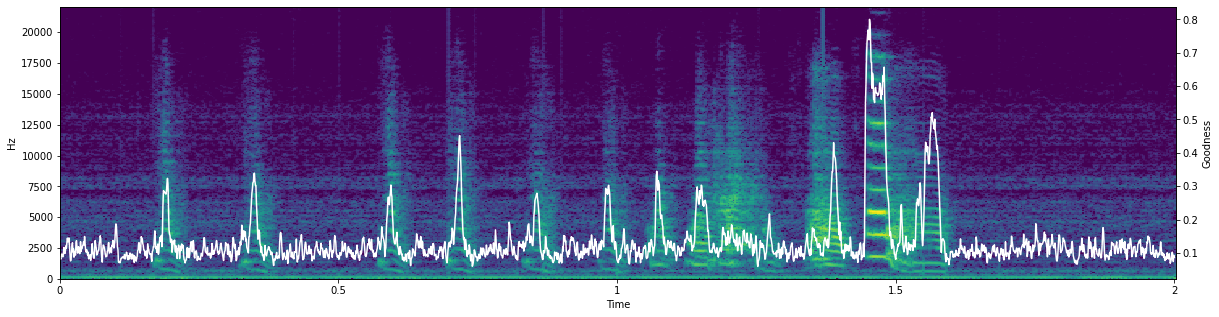

<Figure size 1440x360 with 0 Axes>

In [6]:
song_interval.plot_feature(feature = "Goodness")

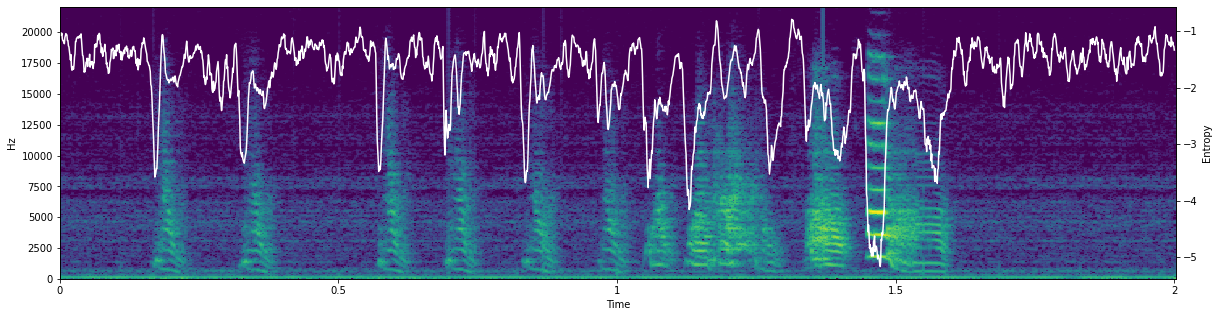

<Figure size 1440x360 with 0 Axes>

In [7]:
song_interval.plot_feature(feature = "Entropy")

This will work for any of the acoustic features in `avn.acoustics` ('Goodness', 'Mean_frequency', 'Frequency_modulation', 'Amplitude_modulation', 'Amplitude', 'Entropy', or 'Pitch')

### Calculating Acoustic Feature Summary Statistics

  Now we know how to calculate acoustic features for each frame in a song interval. These can be interesting if you are curious about how a feature changes over the course of a syllable, for example, but it is generally more useful to have a single score per feature per interval. Thankfully, `SongInterval` also has a method to calculate summary statistics for each acoustic feature over the interval. Let's do that for all the features available (which is the default if we don't specify a subset of features) by calling `.calc_feature_stats()`. 

In [8]:
feature_stats = song_interval.calc_feature_stats()
feature_stats

,Goodness,Mean_frequency,Entropy,Amplitude,Amplitude_modulation,Frequency_modulation,Pitch
mean,0.137592,2891.814561,-1.803505,56.846695,0.000021,0.454302,3511.723555
std,0.091330,747.591179,0.696087,11.296620,0.399036,0.354409,2397.807850
min,0.059758,1417.312546,-5.164130,44.054770,-4.353593,0.001553,538.585520
25%,0.096266,2385.826963,-2.058598,47.804789,-0.011437,0.156986,1133.268704
50%,0.112000,2833.490716,-1.590509,49.840404,-0.000314,0.388846,4277.993715
75%,0.135132,3322.131753,-1.339322,66.323051,0.008567,0.695680,5967.726910
max,0.799963,5229.989962,-0.792397,90.562486,4.662347,1.565718,7297.810765


It is a bit silly to calculate these features over such a long interval as in this example, but these scores can be very valuable when calculated over single syllables. They can be used to cluster syllables, to detect unusual syllable types, to measure the variability of individual syllable types, or to detect changes in song structure before and after a manipulation, etc. 

### Saving Features

`SongInterval` also has built in functions to save acoustic features or acoustic feature statistics .csv files. You can save the full time series of features with the method `.save_features()`, which takes as input `out_file_path` (the path to the folder where you want to save the features), `file_name` (the root name you want to give the file), and `features`(the list of features you want to save - if unspecified all will be saved). This will save a file called `file_name_features.csv` in the designated output folder, as well as a file called `file_name_metadata.csv` which contains all the parameter values used to calculate the features, as well as the avn version, the original file name and the onset and offset timestamps of the interval within the file. This metadata information will ensure that your acoustic feature calculations will be reproducible in the future. 

In [9]:
song_interval.save_features(out_file_path="../sample_data/", file_name = "G402_sample_song")

You can also save the summary statistics in exactly the same way with the method `save_feature_stats()`. The output files will be called `file_name_feature_stats.csv` and `file_name_metadata.csv`. 

In [10]:
song_interval.save_feature_stats(out_file_path="../sample_data/", file_name = "G402_sample_song")

## Calculate Acoustic Features for Many Syllables

In the first section of this tutorial we outlined how to use the `avn.acoustics` module to calculate acoustic features for a single interval of audio. However, a more common workflow is to calculate the acoustic features for many syllables at a time so that they can be compared, clustered etc. Thankfully, the `avn.acoustics` module also has a dedicated class to make it easier to handle large tables of song syllables!

### Creating an AcousticData Object

Similarly to the `avn.syntax.SyntaxData` class, the `avn.acoustics` module has an `AcousticData` class which stores a table of syllables, and has convenient methods to calculate the acoustic features of each of those syllables. 

To begin, we need a table with one row for every syllable that we want to analyze. This table should have the following columns: 
- `files` which should contain the name of the .wav file in which the syllable is found
- `onsets` which should contain the onset timestamp of the syllable in seconds within the file
- `offsets` which should contain the offset timestamp of the syllable in seconds within the file. 

Such a table can be generated using the `avn.segmentation` module, or whatever your preferred syllable segmentation method is as long as it has columns structured as described above. 

The syllable table can also contain any number of other columns (such as syllable labels, notes, etc.) which will be preserved but are not necessary. 

Here is an example of what such a syllable table could look like: 

In [11]:
syll_df = pd.read_csv("../sample_data/G402_syll_df.csv")
syll_df

,files,onsets,offsets,labels
0,G402_43362.23322048_9_19_6_28_42.wav,0.166009,0.225170,i
1,G402_43362.23322048_9_19_6_28_42.wav,0.321043,0.385828,i
2,G402_43362.23322048_9_19_6_28_42.wav,0.570295,0.626757,i
3,G402_43362.23322048_9_19_6_28_42.wav,0.690363,0.751837,i
4,G402_43362.23322048_9_19_6_28_42.wav,0.828390,0.898912,i
...,...,...,...,...
589,G402_43362.43586086_9_19_12_6_26.wav,1.808186,1.976712,b
590,G402_43362.43586086_9_19_12_6_26.wav,2.011905,2.095646,c
591,G402_43362.43586086_9_19_12_6_26.wav,2.114762,2.263175,d
592,G402_43362.43586086_9_19_12_6_26.wav,2.318934,2.402177,e


We can create a new `AcousticData` object by passing this syllable table as input to `acoustics.AcousticData()`, along with the Bird_ID of the subject bird and the path to the folder containing the .wav files in the syllable table. Like so: 

In [12]:
acoustic_data = acoustics.AcousticData(Bird_ID = "G402", syll_df = syll_df, song_folder_path="../sample_data/G402/")

### Calculate Acoustic Features

We can now calculate any combination of acoustic features from this list:  ['Goodness', 'Mean_frequency', 'Frequency_modulation', 'Amplitude_modulation', 'Amplitude', 'Entropy', 'Pitch'] for each syllable in the syllable table with the method `.calc_all_features()`. 

For example, let's calculate the Frequency modulation and the Pitch: 

In [13]:
features = acoustic_data.calc_all_features(features = ['Pitch', 'Frequency_modulation'])
features

,Frequency_modulation,Pitch,files,onsets,offsets,labels
0,"[1.554138752062315, 1.522665756024348, 1.39044...","[1342.9870358953176, 1343.6980823646277, 1347....",G402_43362.23322048_9_19_6_28_42.wav,0.166009,0.22517,i
0,"[1.1951050687546656, 1.2754715619300896, 1.390...","[1337.81447860608, 1340.4311096227414, 1344.11...",G402_43362.23322048_9_19_6_28_42.wav,0.321043,0.385828,i
0,"[1.5256539450074136, 1.4687677891619524, 1.055...","[1334.094750632218, 1332.705804681969, 1337.61...",G402_43362.23322048_9_19_6_28_42.wav,0.570295,0.626757,i
0,"[1.2974545304143592, 1.1919562335359768, 0.876...","[1379.7435850832105, 1394.0666879679236, 1405....",G402_43362.23322048_9_19_6_28_42.wav,0.690363,0.751837,i
0,"[1.4339299730529087, 0.9783459018679432, 0.460...","[1341.9634801933178, 1357.344164568718, 1365.5...",G402_43362.23322048_9_19_6_28_42.wav,0.82839,0.898912,i
...,...,...,...,...,...,...
0,"[1.175703506965015, 1.0612232718381467, 0.9003...","[4838.566260423787, 4807.5771214231645, 4803.9...",G402_43362.43586086_9_19_12_6_26.wav,1.808186,1.976712,b
0,"[1.5624430371801388, 1.5534304047914287, 0.858...","[4059.867476677284, 4130.549387945176, 4148.93...",G402_43362.43586086_9_19_12_6_26.wav,2.011905,2.095646,c
0,"[1.3678523064969446, 1.3134255155920922, 1.232...","[1808.7585386523256, 1808.5561471447486, 1809....",G402_43362.43586086_9_19_12_6_26.wav,2.114762,2.263175,d
0,"[1.3641694039563599, 1.325291611030776, 1.2633...","[568.0846693657795, 567.4237886580611, 566.769...",G402_43362.43586086_9_19_12_6_26.wav,2.318934,2.402177,e


As you can see, this method returns a new dataframe with all the columns in our original syllable table, plus a column for each acoustic feature we specified where each row contains a numpy array with the value of the feature at every short time window within each syllable. This table will also be saved as an attribute of `acoustic_data` called `all_features`. 

In [16]:
acoustic_data.all_features.head()

,Frequency_modulation,Pitch,files,onsets,offsets,labels
0,"[1.554138752062315, 1.522665756024348, 1.39044...","[1342.9870358953176, 1343.6980823646277, 1347....",G402_43362.23322048_9_19_6_28_42.wav,0.166009,0.22517,i
0,"[1.1951050687546656, 1.2754715619300896, 1.390...","[1337.81447860608, 1340.4311096227414, 1344.11...",G402_43362.23322048_9_19_6_28_42.wav,0.321043,0.385828,i
0,"[1.5256539450074136, 1.4687677891619524, 1.055...","[1334.094750632218, 1332.705804681969, 1337.61...",G402_43362.23322048_9_19_6_28_42.wav,0.570295,0.626757,i
0,"[1.2974545304143592, 1.1919562335359768, 0.876...","[1379.7435850832105, 1394.0666879679236, 1405....",G402_43362.23322048_9_19_6_28_42.wav,0.690363,0.751837,i
0,"[1.4339299730529087, 0.9783459018679432, 0.460...","[1341.9634801933178, 1357.344164568718, 1365.5...",G402_43362.23322048_9_19_6_28_42.wav,0.82839,0.898912,i


### Calculate Acoustic Feature Summary Statistics

As mentioned in the first section of this tutorial, it is often more useful to have a single mean and std value for each feature for each syllable, instead of time series (which will take more disk space to save and are all different lengths for different syllables making them difficult to work with). To get just the summary statistics for the acoustic features for each syllable in the `acoustic_data` syllable table, we can use the method `.calc_all_feature_stats()`. 

Let's calculate the summary statistics for the mean frequency for every syllable in our table: 

In [22]:
feature_stats = acoustic_data.calc_all_feature_stats(features = ['Mean_frequency'])
feature_stats

Syll_info                             \
                                    files    onsets   offsets labels   
0    G402_43362.23322048_9_19_6_28_42.wav  0.166009   0.22517      i   
1    G402_43362.23322048_9_19_6_28_42.wav  0.321043  0.385828      i   
2    G402_43362.23322048_9_19_6_28_42.wav  0.570295  0.626757      i   
3    G402_43362.23322048_9_19_6_28_42.wav  0.690363  0.751837      i   
4    G402_43362.23322048_9_19_6_28_42.wav   0.82839  0.898912      i   
..                                    ...       ...       ...    ...   
589  G402_43362.43586086_9_19_12_6_26.wav  1.808186  1.976712      b   
590  G402_43362.43586086_9_19_12_6_26.wav  2.011905  2.095646      c   
591  G402_43362.43586086_9_19_12_6_26.wav  2.114762  2.263175      d   
592  G402_43362.43586086_9_19_12_6_26.wav  2.318934  2.402177      e   
593  G402_43362.43586086_9_19_12_6_26.wav   2.43381  2.563447      f   

    Mean_frequency                                                      \
              mean          std          min          25%          50%   
0      2907.785023  1121.457694  1412.581905  2144.890471  2500.659910   
1      2703.070150   941.459831  1498.764199  1765.620166  2566.293475   
2      3012.216848  1175.352043  1562.812118  2162.649309  2471.829333   
3      2916.965205  1049.030479  1504.505563  2223.822274  2500.249679   
4      2724.163727   944.713327  1504.298356  1965.995565  2532.514305   
..             ...          ...          ...          ...          ...   
589    4211.076484   930.050590  1923.876639  3771.950718  4486.205261   
590    3909.581357   326.175365  3197.165752  3650.098384  3947.938012   
591    3771.857709   348.871318  3010.147580  3600.451037  3732.176595   
592    3997.790057   272.362455  3387.536710  3781.849900  4105.547617   
593    3770.705568   554.947440  1941.667383  3547.984968  3958.680979   

                               
             75%          max  
0    3946.849894  4906.114381  
1    3330.237660  4636.205351  
2    4066.341596  5047.588192  
3    3732.941696  4843.951932  
4    3406.932164  4577.235024  
..           ...          ...  
589  4859.350242  5467.731391  
590  4124.447948  4458.822812  
591  3915.852528  5122.593444  
592  4231.509360  4317.167893  
593  4109.973595  4351.028939  

[594 rows x 11 columns]

### Saving Features

Like the `SongInterval` class, the `AcousticData` class also has methods to automatically save your acoustic features, along with a metadata file with all the information necessary to reproduce their calculation. 

While it is possible to save the timeseries of each acoustic feature for every syllable with the method `.save_features()`, this will occupy considerable disk space and usually isn't necessary. Instead, I suggest saving just the summary statistics for each feature with the method `.save_feature_stats()`. 

Both `.save_features()` and `.save_feature_stats()` take as input an `out_file_path` (the path to the folder where you want the .csv files to be saved), `file_name` (the root name you want to give the file) and `features` (the list of features you want to save. If this is not specified all features will be saved). 

Let's save the summary statistics for Goodness of Pitch and Amplitude for all the syllables in our table:

In [23]:
acoustic_data.save_feature_stats(out_file_path="../sample_data/", file_name = "G402_syll_table", features =  ["Goodness", "Amplitude"])

This calculates and saves the summary statistics for each acoustic feature specified in a file called `G402_syll_table_all_feature_stats.csv`, and saves a file called `G402_syll_table_metadata.csv`. 